In [33]:
import doc_tool
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec

In [34]:
# not works on jupyter
#import sys,os
#PATH = os.path.dirname(os.path.abspath(__file__))
#print(PATH)
#sys.path.insert(PATH)

In [35]:
docContent = doc_tool.readFile("/home/hmenn/Workspace/doc2graph/dataset/turkishText1.txt")

In [36]:
pureSentences = doc_tool.text2sentences(docContent)

In [37]:
print("Sentences:",pureSentences)

Sentences: ['mazeretler bitince artık okuldan arkadaşlarına görünmeden ayrılmaya başlamıştı', 'bir gün koridorda bir miktar para görmüş parayı almış ve kendisininmiş gibi cebine atmıştı', 'önceleri vicdanını kemiren soruları ama çevrede kimse yoktu ben almasaydım başkası alacaktı hâl böyle olunca benim almamın ne mahzuru olabilir ki diyerek geçiştiriyordu', 'bir başka gün ranzanın üzerinde her zaman onu pastaneye davet eden çocuklardan birinin cüzdanını görünce içi bir garip olmuş etrafı kontrol edip ortalıkta kimseler olmadığını anlayınca cüzdandan bir miktar para almıştı', 'bu iki olaydan sonra vicdanı onu rahatsız etse de bulduğu mazeretler onu gerçekleri görmekten uzaklaştırmış bende para yok onlarda var biraz alsam bir şey olmaz belki arkadaşım memnun da olur', 'ben olsaydım onun yerinde mutlu olurdum', 'benim gibi bir kişiye biraz yardım yapmak ona zarar vermez ki gibi yanlış düşüncelere sevk etmişti', 'bir vakit sonra parasını kaybeden talebe şikâyetçi olmuş yurtta arama yapılmı

In [38]:
stopwords = doc_tool.load_stop_words("/home/hmenn/Workspace/doc2graph/dataset/tr_stopwords.txt")

In [39]:
words = doc_tool.sentences2Words(pureSentences,stopwords)

TypeError: sentences2Words() takes 1 positional argument but 2 were given

In [40]:
print("Words:",words)

Words: ['mazeretler', 'bitince', 'artık', 'okuldan', 'arkadaşlarına', 'görünmeden', 'ayrılmaya', 'başlamıştı', 'bir', 'gün', 'koridorda', 'bir', 'miktar', 'para', 'görmüş', 'parayı', 'almış', 've', 'kendisininmiş', 'gibi', 'cebine', 'atmıştı', 'önceleri', 'vicdanını', 'kemiren', 'soruları', 'ama', 'çevrede', 'kimse', 'yoktu', 'ben', 'almasaydım', 'başkası', 'alacaktı', 'hâl', 'böyle', 'olunca', 'benim', 'almamın', 'ne', 'mahzuru', 'olabilir', 'ki', 'diyerek', 'geçiştiriyordu', 'bir', 'başka', 'gün', 'ranzanın', 'üzerinde', 'her', 'zaman', 'onu', 'pastaneye', 'davet', 'eden', 'çocuklardan', 'birinin', 'cüzdanını', 'görünce', 'içi', 'bir', 'garip', 'olmuş', 'etrafı', 'kontrol', 'edip', 'ortalıkta', 'kimseler', 'olmadığını', 'anlayınca', 'cüzdandan', 'bir', 'miktar', 'para', 'almıştı', 'bu', 'iki', 'olaydan', 'sonra', 'vicdanı', 'onu', 'rahatsız', 'etse', 'de', 'bulduğu', 'mazeretler', 'onu', 'gerçekleri', 'görmekten', 'uzaklaştırmış', 'bende', 'para', 'yok', 'onlarda', 'var', 'biraz', 'a

In [12]:
textGraph = nx.Graph()

In [41]:
# trace all text and extract simple graph. Each node/word connected with it's prev. word
    
textGraph.add_node(words[0]) 
for i in range(1,len(words)): 
    textGraph.add_node(words[i]) 
    textGraph.add_edge(words[i-1],words[i],weight=1)

In [42]:
print("Nodes[",textGraph.number_of_nodes(),"]:",textGraph.nodes())

Nodes[ 174 ]: ['etrafı', 'görünce', 'bekleyen', 'artık', 'mahzuru', 'alsam', 'uzun', 'almıştı', 'bende', 'oldu', 'ne', 'beklediler', 'başkası', 'parası', 'söylediğine', 'vicdanı', 'resimde', 'arama', 'bulununca', 'para', 'tüneyen', 'vermez', 'benim', 'yapılmıştı', 'iki', 'köşesinde', 'sokağın', 'şey', 'kemiren', 'her', 'dolabında', 'davet', 'olurdum', 'olmuş', 'kendisininmiş', 'miktar', 'başka', 'uzadı', 'getirmiş', 'memnun', 'yoktu', 'mazeretler', 'onun', 'tarafta', 'çalmayı', 'söylemek', 'görmekten', 'arkadaşlar', 'saat', 'olur', 'zarar', 'ben', 'uzadıkça', 'çevrede', 'hâl', 'yanlış', 'diyerek', 'gibi', 'davranalım', 'eden', 'almamın', 'istedi', 'hâline', 'yapmak', 'kuş', 'sevk', 'böyle', 'görmüş', 'hocamıza', 'içi', 'şaşırmışlardı', 'parayı', 'ranzanın', 'etse', 'zîrâ', 'etmişti', 'ama', 'çocuklar', 'dalda', 'ortalıkta', 'talebelere', 'şikâyetçi', 'üzerinde', 'pastaneye', 'bunu', 'önce', 'alışkanlık', 've', 'çocuklardan', 'olaydan', 'kişiye', 'çağırıp', 'yardım', 'biraz', 'cebine', 

In [43]:
print("Edges[",textGraph.number_of_edges(),"]:",textGraph.edges())

Edges[ 214 ]: [('etrafı', 'kontrol'), ('etrafı', 'olmuş'), ('görünce', 'içi'), ('görünce', 'cüzdanını'), ('bekleyen', 'kedi'), ('bekleyen', 'köşesinde'), ('artık', 'okuldan'), ('artık', 'bitince'), ('mahzuru', 'ne'), ('mahzuru', 'olabilir'), ('alsam', 'bir'), ('alsam', 'biraz'), ('uzun', 'uzun'), ('uzun', 'düşündüler'), ('uzun', 'zordu'), ('almıştı', 'para'), ('almıştı', 'bu'), ('bende', 'para'), ('bende', 'uzaklaştırmış'), ('oldu', 'gün'), ('oldu', 'istırap'), ('ne', 'yapacaklarını'), ('ne', 'almamın'), ('ne', 'idareciler'), ('beklediler', 'vakit'), ('beklediler', 'çocuğu'), ('başkası', 'almasaydım'), ('başkası', 'alacaktı'), ('parası', 'tarafta'), ('parası', 'çalınan'), ('söylediğine', 'onun'), ('söylediğine', 'göre'), ('vicdanı', 'sonra'), ('vicdanı', 'onu'), ('resimde', 'bu'), ('resimde', 'bir'), ('arama', 'yapılmıştı'), ('arama', 'yurtta'), ('bulununca', 'dolabında'), ('bulununca', 'da'), ('para', 'yapılmıştı'), ('para', 'miktar'), ('para', 'görmüş'), ('para', 'hilminin'), ('para'

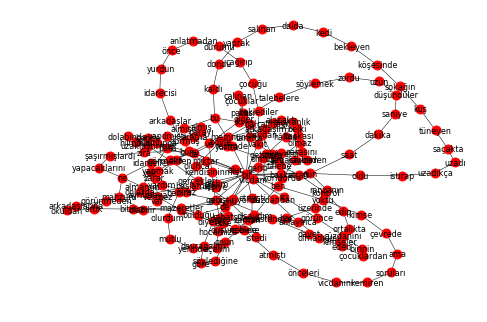

In [44]:
nx.draw(textGraph,width=0.5,node_size=80,font_size=8,with_labels=True)

In [45]:
plt.savefig("/home/hmenn/Workspace/doc2graph/outputs/textGraph.pdf") # save graph to pdf file

In [19]:
graphN2V = Node2Vec(textGraph, dimensions=64, walk_length=30, num_walks=200, workers=4) 

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:24<00:00,  2.07it/s]





In [20]:
model = graphN2V.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

In [22]:
testWord = "zaman"
similarities = model.wv.most_similar(testWord)  # Output node names are always strings

#save and print results
with open("/home/hmenn/Workspace/doc2graph/outputs/similarity.txt","w") as f:
    f.write("Word:"+testWord+"\n")
    f.write(str(similarities))

print("Similarities of",testWord)
print(similarities)
    

Similarities of uzun
[('düşündüler', 0.8481828570365906), ('zordu', 0.8265682458877563), ('saniye', 0.7992476224899292), ('söylemek', 0.7741044759750366), ('dakika', 0.6241613626480103), ('talebelere', 0.580470860004425), ('saat', 0.4284515976905823), ('diğer', 0.33806800842285156), ('çocuklar', 0.330166220664978), ('parası', 0.209137961268425)]


In [24]:
model.wv.save_word2vec_format("/home/hmenn/Workspace/doc2graph/outputs/node2vec_output.txt")